**Use Dataframe constructor in Pandas to create your own Dataframe.**

**ML Assignment 2**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = {
    'batsman' : ['V Sehwag','SR Tendulkar','G Gambhir','V Kohli','MS Dhoni','Yuvraj Singh'],
    'runs' : [0, 18,97,35,91, 21],
    'balls' : [ 2, 14, 122, 49, 79, 24]
}
df = pd.DataFrame(df, columns = ['batsman','runs','balls'])

**Print a chosen record (row) or a chosen column (data field)**

In [ ]:
print("specific row --1st row")
print(df.iloc[1,:])   #PRINT FIRST ROW

print("specific column --batsman")
print(df.loc[:,'batsman'])   #PRINT BATSMAN COLUMN

specific row --1st row
batsman    SR Tendulkar
runs                 18
balls                14
Name: 1, dtype: object
specific column --batsman
0        V Sehwag
1    SR Tendulkar
2       G Gambhir
3         V Kohli
4        MS Dhoni
5    Yuvraj Singh
Name: batsman, dtype: object


**Print rows that satisfy a condition on one of the column entries.**

In [ ]:
print(df[df['runs']>50]) #PRINTING ROWS WHERE RUNS OF PLAYER IS GREATER THAN 50

     batsman  runs  balls
2  G Gambhir    97    122
4   MS Dhoni    91     79


**Also sort the records based on the number of runs scored by each player.**

In [ ]:
df_sort=df.sort_values('runs')

In [ ]:
df_sort #PRINT SORTED DATAFRAME

,batsman,runs,balls
0,V Sehwag,0,2
1,SR Tendulkar,18,14
5,Yuvraj Singh,21,24
3,V Kohli,35,49
4,MS Dhoni,91,79
2,G Gambhir,97,122


**Use vectorised operations. For example, you may be required to compute the percentage runs scored by each player, where the percentage is with respect to the total runs scored by the team in an innings**

In [ ]:
df['run_percent'] = (df['runs'] /
                      df['runs'].sum()) * 100

In [ ]:
df #PRINT DATAFRAME WITH RUN PERCENTAGE COLUMN

,batsman,runs,balls,run_percent
0,V Sehwag,0,2,0.000000
1,SR Tendulkar,18,14,6.870229
2,G Gambhir,97,122,37.022901
3,V Kohli,35,49,13.358779
4,MS Dhoni,91,79,34.732824
5,Yuvraj Singh,21,24,8.015267


**Add a new column to the Dataframe.**

In [ ]:
df['jersey']=[44,10,5,18,7,12]

In [ ]:
df #PRINT DATAFRAME WITH JERSEY COLUMN

,batsman,runs,balls,run_percent,jersey
0,V Sehwag,0,2,0.000000,44
1,SR Tendulkar,18,14,6.870229,10
2,G Gambhir,97,122,37.022901,5
3,V Kohli,35,49,13.358779,18
4,MS Dhoni,91,79,34.732824,7
5,Yuvraj Singh,21,24,8.015267,12


**Export the Dataframe to a file in pickle format and save it as a file.  Read the pickle file back to the program.**

In [ ]:
df.to_pickle("/content/sample_data/cricket.pkl")

In [ ]:
df2 = pd.read_pickle("/content/sample_data/cricket.pkl")

In [ ]:
df2 #PRINT RE-READED NEW DATAFRAME

,batsman,runs,balls,run_percent,jersey
0,V Sehwag,0,2,0.000000,44
1,SR Tendulkar,18,14,6.870229,10
2,G Gambhir,97,122,37.022901,5
3,V Kohli,35,49,13.358779,18
4,MS Dhoni,91,79,34.732824,7
5,Yuvraj Singh,21,24,8.015267,12


**Use matplotlib library to make a scatter plot of columns that contain numeric
data. Provide labels to the axes.**

In [ ]:
import matplotlib.pyplot as plt

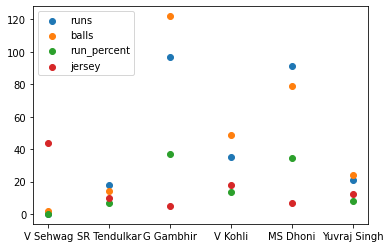

In [ ]:
x1 = df.runs
x2 = df.balls
x3 = df.run_percent
x4 = df.jersey
y = df.batsman

x1_plot = plt.scatter(y,x1)
x2_plot = plt.scatter(y,x2)
x3_plot = plt.scatter(y,x3)
x4_plot = plt.scatter(y,x4)

plt.legend((x1_plot, x2_plot, x3_plot, x4_plot),('runs','balls','run_percent','jersey'))

#PLOT SCATTER GRAPH
plt.show()

**Implement linear regression to model the dependency between two variables - the predictor x and target y. You can choose any two columns in your data frame as the two variables. Print the coefficients obtained from linear regression and plot the straight line on the scatter plot.  Do not use any inbuilt function for implementing linear regression.  You need to formulate a linear system of equations and solve them using pseudo inverse.  You can compare your result with that produced by the fit() function of LinearRegression model in sklearn**

coefficient: 
[1.0921748]


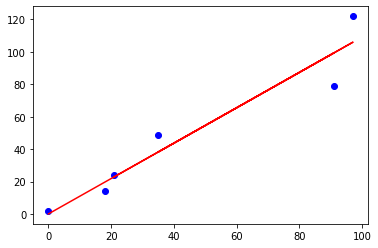

In [ ]:
from numpy.linalg import inv #USING NUMPY TO CALCULATE INVERSE
from matplotlib import pyplot

X1 = np.array(df['runs'])
y1 = np.array(df['balls'])
data = np.stack((X1,y1),axis=1)

X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))

b = inv(X.T.dot(X)).dot(X.T).dot(y)  #USING X^+ = (X^T . x)^-1 . X^T
print("coefficient: ")
print(b) #PRINTING COEFFICIENT

y_pred = X.dot(b)

#PLOT GRAPH
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='red')

plt.show()

Using LinearRegression in sklearn

In [ ]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = np.array(df['runs']).reshape(-1, 1)
y = np.array(df['balls']).reshape(-1, 1)

regr = LinearRegression()

regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

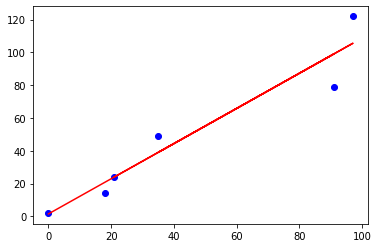

In [ ]:
y_pred = regr.predict(X)
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='red')

#PLOT GRAPH
plt.show()

By Using Sklearn library we see that both the graphs are same and hence we can conclude that sklearn also uses some kind of similar thing to calculate regression.